# Popular bagging methods and Boosting

---

- Random Forests
- Extremely Randomized Trees
- Intro to "Boosting" ensemble method

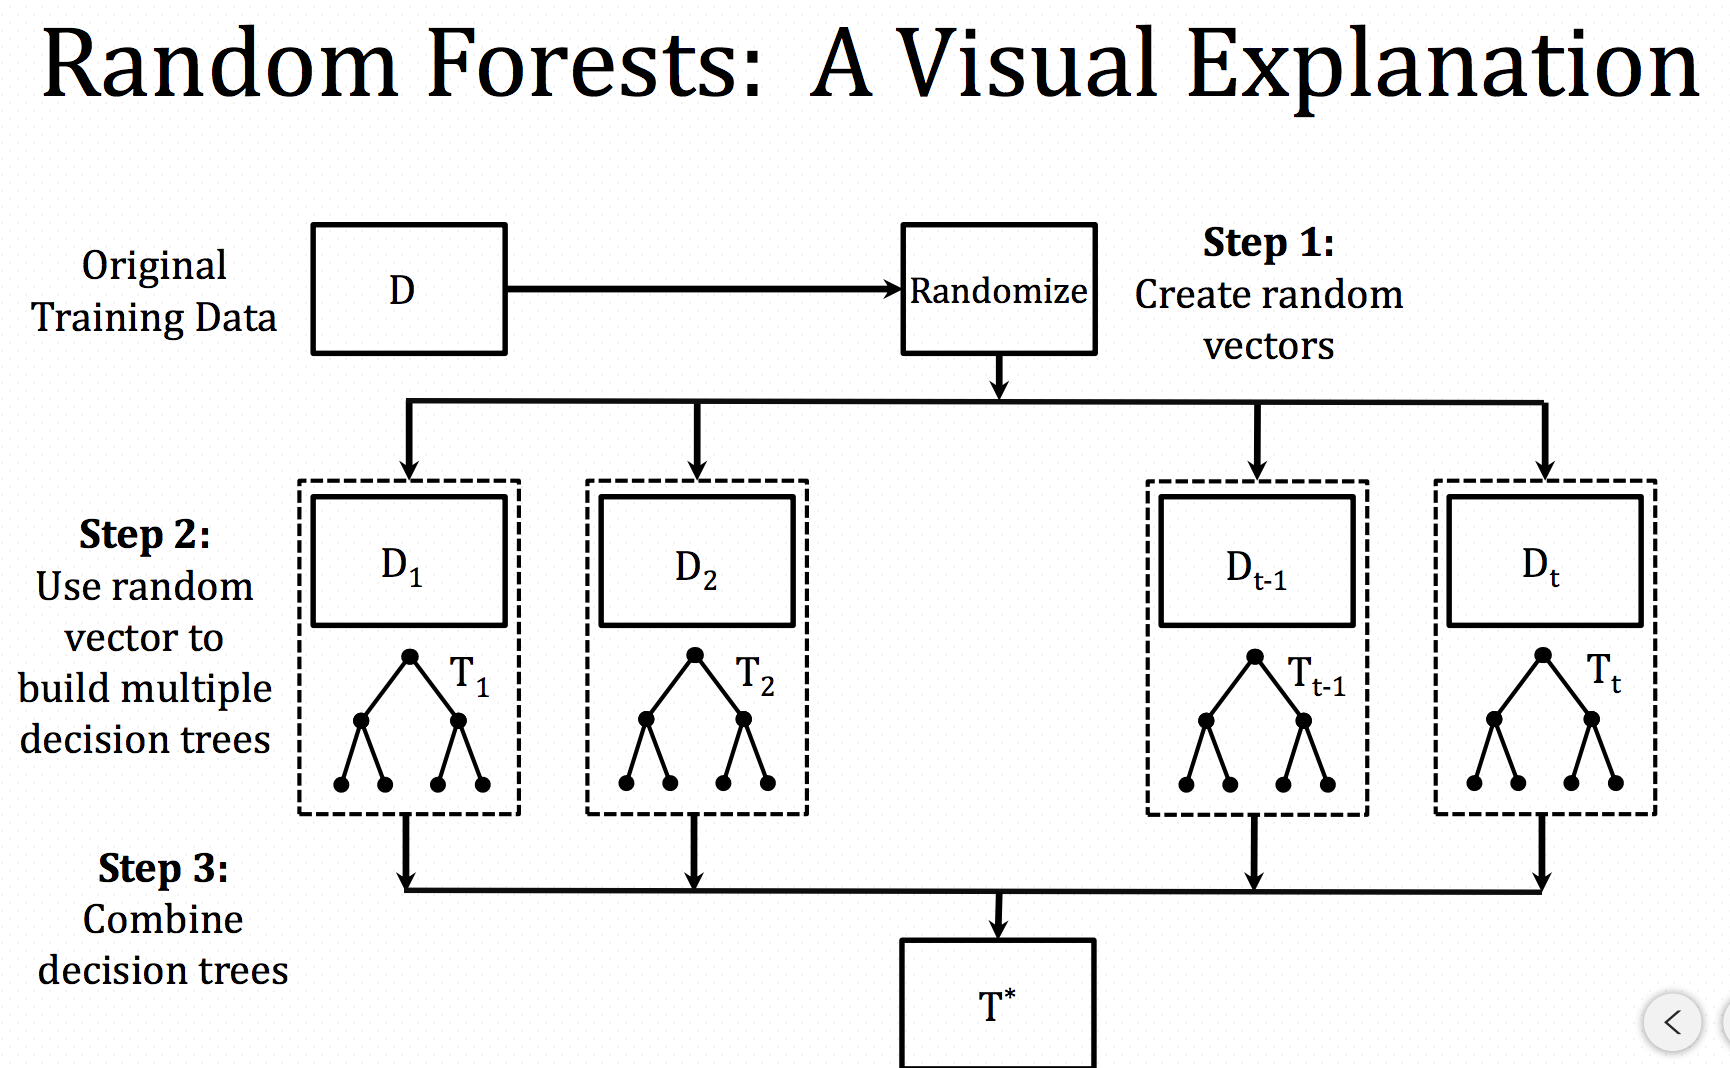

In [2]:
from IPython.display import Image
Image(filename='../assets/images/randomforests_viz.png', width=800) 

## Random Forests

**Random Forests** are a special case of general bagging ensemble methods. They get a special name due to their popularity in machine learning.

---

**RANDOM FORESTS**

- Use decision trees as the base estimators
- Bootstraps rows (random selection with replacement) of the dataset for each base estimator
- Randomly selects subsets of the features (prediction columns)

Random subsetting of the predictors is also referred to as **feature bagging**.

### Why feature bagging?

---

In a bagging ensemble of decision trees where each tree gets all the predictors, **decision tree base estimators can end up correlated**. 

For example, if one or a few features are very strong predictors for the dependent variable, these features will be selected in many or most of the bagging base trees. This makes the decisions of the base estimator trees correlated.

By selecting a random subset of the features at each split (feature bagging), we reduce the amount of correlation between the base models, which strengthens the predictions of the overall model.

### Feature bagging heuristics

---

Let $p$ be the number of features.

**For classification problems**, $\sqrt{p}$ (rounded down) is the recommended number of features to randomly subset for each split. 

**For regression problems** $p/3$ (rounded down) is the recommended feature subset size with a minimum node depth of 5 as the default.

## Extremely Randomized Trees

---

**Extremely Randomized Trees** (in sklearn: **`ExtraTrees`**) are different from Random Forests in two ways:

1. The data sent to each base estimator is no longer a bootstrapped sample.
2. Within each base estimator, the node splits are no longer optimized based on purity, but instead split criteria is determined at random.

---

In other words, **the top-down splitting in each base tree learner is randomized.**

The split values at nodes are selected from the feature's possible range in the data to ensure the split actually splits up the data at each node.



###  Extremely Randomized Trees vs. Random Forests

---

1. **Reduces variance more than RF:** greater variety of leaf nodes.
2. **Bias is increased more than RF**: each base estimator tree has greater expected error between observations and decision boundary.
3. **Computationally faster to train**: no optimal split calculations at nodes.
4. **Less correlation between base estimator decisions.**
5. **Potentially better performance than RF.**

---

They are not guaranteed to perform better than Random Forests. It depends on the data and the problem. Might as well try both.

[For a full overview of differences see this paper.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf)

## Boosting

Boosting is another ensemble method with a theoretically different approach than bagging.

---

**BOOSTING**

1. **Base model fitting an iterative procedure**: it cannot be run in parallel.
- **Weights assigned to observations indicating their "importance"**: samples with higher weights are given higher influence on the total error of the next model, prioritizing those observations.
- **Weights change at each iteration with the goal of correcting the errors/misclassifications of the previous iteration**: the first base estimator is fit with uniform weights on the observations.
- **Final prediction is typically constructed by a weighted vote**: weights for each base model depends on their training errors or misclassification rates.


### Pros and cons

---

**PROS**

- Achieves higher performance than bagging when hyper-parameters tuned properly.
- Can be used for classification and regression equally well.
- Easily handles mixed data types.
- Can use "robust" loss functions that make the model resistant to outliers.

---

**CONS**

- Difficult and time consuming to properly tune hyper-parameters.
- Cannot be parallelized like bagging (bad scalability when huge amounts of data).
- More risk of overfitting compared to bagging.


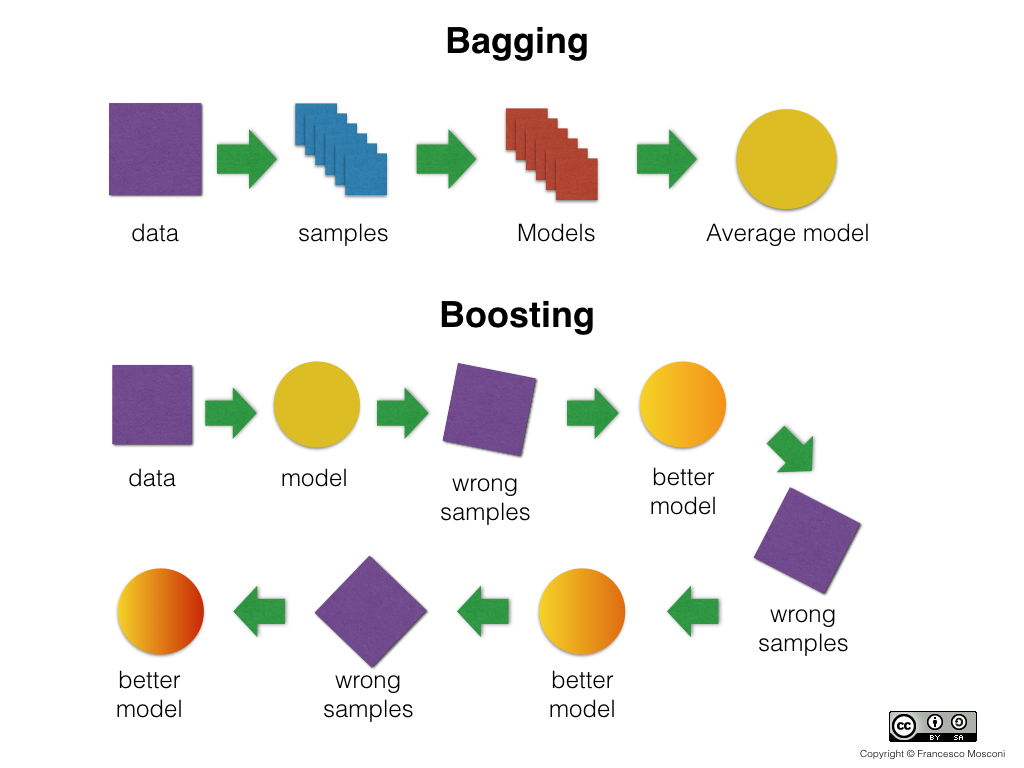

In [7]:
from IPython.display import Image
Image(filename='../assets/images/BoostingVSBagging.png') 

### Boosting and bias-variance 

---

Recall that **bagging aims to reduce variance**.

**Boosting aims to reduce bias!** (and can reduce variance a bit as well).

---

#### Why?

The rationale/theory behind Boosting is to combines **many weak learners into a single strong learner.**

Instead of deep/full decision trees like in bagging, **Boosting uses shallow/high bias base estimators.**

Thus, each weak learner has:

- Low variance
- High bias

And the iterative fitting to explain error/misclassification unexplained by the previous base models attempts to reduce this bias without increasing variance. (Next base model will have similar predictions to the prior estimator).

### AdaBoost

---

AdaBoost is the most famous and original boosting algorithm.

Let:

### $$ \text{AdaBoost prediction} = F_T(x) = \sum_{t=1}^T f_t(x) $$

Where $f_t{x}$ is a weak base model/estimator and $x$ is the input observation.

Each weak learner produces an output, hypothesis $h(x_i)$, for each sample in the training set. 

At each iteration $t$, the current weak learner is assigned a coefficient $\alpha_t$ such that:

### $$\text{sum of training error} =  E_t = \sum_i E[F_{t-1}{x_i} + \alpha_t h(x_i)] $$

Is minimized, where:

### $E[F()]$
indicates the error function.

### $F_{t-1}(x)$ 
is the overall boosted classifier prediction built up to the previous iteration.

### $f_t{x} = \alpha_t h(x)$ 
is the prediction of the weak learner considered for addition to the overall classifier.

---

Here  is the boosted classifier that has been built up to the previous stage of training, $E(F)$ is some error function and $f_t(x) = \alpha_t h(x)$ is the weak learner that is being considered for addition to the final classifier.

At each iteration, a weight is assigned to each sample in the training set equal to the current error $E(F_{t-1}(x_i))$ on that sample to inform training of the next weak learner.


### Gradient Boosting Models

---

A Gradient Boosting Model (GBM) is a generalization of boosting that is essentially an **approximation of gradient descent**.

---

### Why?

**In gradient descent, we minimized prediction error with regard to the coefficients $b_1 ... b_i$**

**GBM minimizes with respect to the function defining prediction errors $f(x)$**

More intuitively, at each step in the GBM:
- A model $h(x)$ is constructed to further reduce overall error defined by $f(x)$
- The model $h(x)$ therefore _emulates a step descending the gradient of the total error space._ 

By minimizing the error with respect to the function we can perform the "gradient descent" down a loss function like least-squares loss for non-parametric models!

---

_For more math-y explanations (as if this wasn't bad enough) see [here](https://www.quora.com/What-is-an-intuitive-explanation-of-Gradient-Boosting) and [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/)_
